# Notebook Contains : 
------------------------------------------------------- Techniques Used----------------------------------------------------- <br>

1. Data Preprocessing  
2. Data Engineering 
3. Correlation
4. Standard Scaler
5. Standardization
6. Min Max Scaler
7. Data Imputation - KNN Imputer
8. Extra tree classifier
9. PCA
10. Data Transformation
11. Data Profiling
12. Data Standardization
13. Lasso Regression

----------------------------------------------- Algorithms With Hyperparameter Tuning---------------------------------------- <br>

1. Random Forest Algorithm 
2. XGBoost
3. K-Means
4. Linear Regression


## Import Libraries 

In [778]:
## General Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Data related Libraries 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

## Data error and accuracy related libaries 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor as rf_sk
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split


## Algo related libraries 
from xgboost import XGBRegressor
import plotly.express as px
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn import cluster
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler


## Seaborn general figure settings 
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

## Import Data from GitHub

Dataset Glossary: 
Dow = Day of the week
Sedentary = Idle time or inactive 


In [779]:
!git clone https://github.com/saadghojaria55/fitbit-tracker.git

Cloning into 'fitbit-tracker'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 93 (delta 24), reused 27 (delta 10), pack-reused 0
Unpacking objects: 100% (93/93), done.
Checking out files: 100% (22/22), done.


In [780]:
!pwd

/content/fitbit-tracker/dataset/archive/fitbit-tracker/dataset/archive/fitbit-tracker/dataset/archive/fitbit-tracker/dataset/archive


In [781]:
ls

dailyActivity_merged.csv      minuteCaloriesNarrow_merged.csv
dailyCalories_merged.csv      minuteCaloriesWide_merged.csv
dailyIntensities_merged.csv   minuteIntensitiesNarrow_merged.csv
dailySteps_merged.csv         minuteIntensitiesWide_merged.csv
FitbitAnalysis.xlsx           minuteMETsNarrow_merged.csv
fitbit-tracker/               minuteSleep_merged.csv
heartrate_seconds_merged.csv  minuteStepsNarrow_merged.csv
hourlyCalories_merged.csv     minuteStepsWide_merged.csv
hourlyIntensities_merged.csv  sleepDay_merged.csv
hourlySteps_merged.csv        weightLogInfo_merged.csv


In [782]:
cd fitbit-tracker/dataset/archive

/content/fitbit-tracker/dataset/archive/fitbit-tracker/dataset/archive/fitbit-tracker/dataset/archive/fitbit-tracker/dataset/archive/fitbit-tracker/dataset/archive


In [783]:
ls

dailyActivity_merged.csv         minuteCaloriesWide_merged.csv
dailyCalories_merged.csv         minuteIntensitiesNarrow_merged.csv
dailyIntensities_merged.csv      minuteIntensitiesWide_merged.csv
dailySteps_merged.csv            minuteMETsNarrow_merged.csv
FitbitAnalysis.xlsx              minuteSleep_merged.csv
heartrate_seconds_merged.csv     minuteStepsNarrow_merged.csv
hourlyCalories_merged.csv        minuteStepsWide_merged.csv
hourlyIntensities_merged.csv     sleepDay_merged.csv
hourlySteps_merged.csv           weightLogInfo_merged.csv
minuteCaloriesNarrow_merged.csv


In [784]:
df_daily_activity =pd.read_csv("dailyActivity_merged.csv")

In [785]:
df_sleepdata =pd.read_csv("sleepDay_merged.csv")

In [786]:
df_sleepdata['SleepDay']=pd.to_datetime(df_sleepdata['SleepDay'])

## Data Preprocessing  

In [787]:
df_daily_activity.describe()

Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000                  0.000000   
25%                    0.000000            0.000000                  0.000000   
50%                    0.000000            0.210000                  0.240000   
75%                    0.000000            2.052500                  0.800000   
max                    4.942142           21.920000                  6.480000   

       LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
count           940.000000               940.000000         940.000000   
mean              3.340819                 0.001606          21.164894   
std               2.040655                 0.007346          32.844803   
min               0.000000                 0.000000           0.000000   
25%               1.945000                 0.000000           0.000000   
50%               3.365000                 0.000000           4.000000   
75%               4.782500                 0.000000          32.000000   
max              10.710000                 0.110000         210.000000   

       FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  \
count           940.000000            940.000000        940.000000   
mean             13.564894            192.812766        991.210638   
std              19.987404            109.174700        301.267437   
min               0.000000              0.000000          0.000000   
25%               0.000000            127.000000        729.750000   
50%               6.000000            199.000000       1057.500000   
75%              19.000000            264.000000       1229.500000   
max             143.000000            518.000000       1440.000000   

          Calories  
count   940.000000  
mean   2303.609574  
std     718.166862  
min       0.000000  
25%    1828.500000  
50%    2134.000000  
75%    2793.250000  
max    4900.000000

In [788]:
df_daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

*Null Values in df_daily_activty*

In [789]:
len(df_daily_activity.isnull().sum())

15

In [790]:
df_daily_activity['ActivityDate']=pd.to_datetime(df_daily_activity['ActivityDate'])

1. Correlation Matrix 

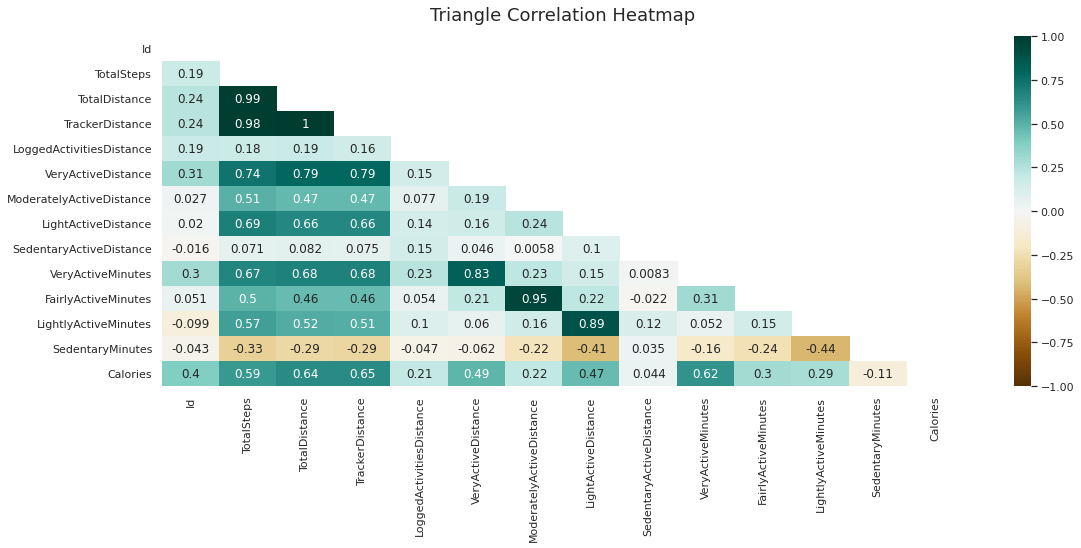

In [791]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df_daily_activity.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_daily_activity.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


2. PCA <br>
PCA is a tool for identifying the main axes of variance within a data set and allows for easy data exploration to understand the key variables in the data and spot outliers. Properly applied, it is one of the most powerful tools in the data analysis tool kit.

In [792]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(df_daily_activity.iloc[:,2:-1])

PCA()

In [793]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[9.96538128e+01 3.15281161e-01 2.82265857e-02 1.68802774e-03
 9.80748848e-04 5.43123807e-06 3.11158973e-06 1.38859605e-06
 5.27391288e-07 2.12357877e-07 7.70509762e-09 1.84194363e-10]



In [794]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 99.6538128   99.96909396  99.99732054  99.99900857  99.99998932
  99.99999475  99.99999786  99.99999925  99.99999978  99.99999999
 100.         100.        ]



Text(0, 0.5, 'Explained variance (%)')

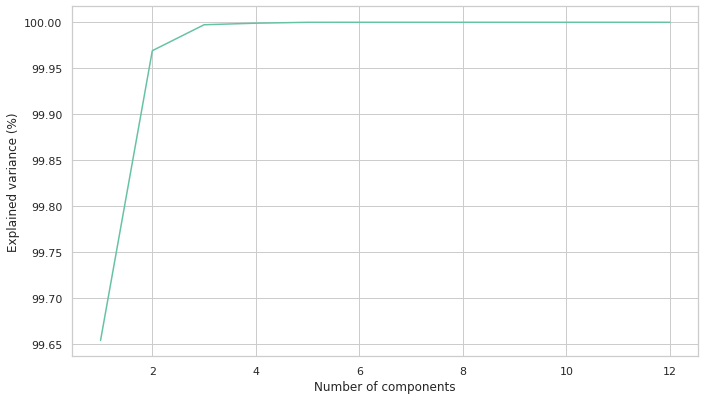

In [795]:
# Scree Plot 
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

## Data Profiling -- Knowing the data


What is date range of the Data ? 

In [796]:
def date_range(df) :
    # earliest date in a dataframe, fortunately the 'date' column for every dataframe has an index of 1
    min_date = df_daily_activity.iloc[:,1].min()
    # Latest date in a dataframe
    max_date = df_daily_activity.iloc[:,1].max()
    return print('This dataframe includes records from ' + str(min_date) + ' to ' + str(max_date))

date_range(df_daily_activity)

This dataframe includes records from 2016-04-12 00:00:00 to 2016-05-12 00:00:00


No of Users in the dataset

In [797]:
print("No of users in the dataset :",len(df_daily_activity['Id'].unique()))

No of users in the dataset : 33


Group By User and DOW (Day of week) and find Average calories , totalsteps , total Distance

In [798]:
# Average Calories, Steps and Distance by Id and by day of the week
df_daily_activity['dow']=df_daily_activity['ActivityDate'].dt.dayofweek

In [799]:
activity_dist=df_daily_activity.groupby(['Id','dow'])['Calories', 'TotalSteps','TotalDistance'].mean()

In [800]:
# Changing column names just for better understanding 
activity_dist = activity_dist.rename(columns={'Calories':'avg_calories','TotalSteps': 'avg_steps', 'TotalDistance': 'avg_distance'})

In [801]:
df_daily_activity.loc[:,['ActivityDate','Calories','TotalSteps','TotalDistance']]

ActivityDate  Calories  TotalSteps  TotalDistance
0     2016-04-12      1985       13162       8.500000
1     2016-04-13      1797       10735       6.970000
2     2016-04-14      1776       10460       6.740000
3     2016-04-15      1745        9762       6.280000
4     2016-04-16      1863       12669       8.160000
..           ...       ...         ...            ...
935   2016-05-08      2847       10686       8.110000
936   2016-05-09      3710       20226      18.250000
937   2016-05-10      2832       10733       8.150000
938   2016-05-11      3832       21420      19.559999
939   2016-05-12      1849        8064       6.120000

[940 rows x 4 columns]


Information on the BMR of our users if we filter only the data points with zero steps taken and get the statistics on the Calories distribution.

In [802]:
df_daily_activity[df_daily_activity['TotalSteps']==0]['Calories'].describe()

count      77.000000
mean     1657.077922
std       557.082290
min         0.000000
25%      1496.000000
50%      1841.000000
75%      1980.000000
max      2664.000000
Name: Calories, dtype: float64

In [803]:
df_daily_activity[df_daily_activity['Calories']==0]

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
30   1503960366   2016-05-12           0            0.0              0.0   
653  6290855005   2016-05-10           0            0.0              0.0   
817  8253242879   2016-04-30           0            0.0              0.0   
879  8583815059   2016-05-12           0            0.0              0.0   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
30                        0.0                 0.0                       0.0   
653                       0.0                 0.0                       0.0   
817                       0.0                 0.0                       0.0   
879                       0.0                 0.0                       0.0   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
30                   0.0                      0.0                  0   
653                  0.0                      0.0                  0   
817                  0.0                      0.0                  0   
879                  0.0                      0.0                  0   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
30                     0                     0              1440         0   
653                    0                     0              1440         0   
817                    0                     0              1440         0   
879                    0                     0              1440         0   

     dow  
30     3  
653    1  
817    5  
879    3

There are many rows with all zero values except for the SedentaryMinutes column. In this column we see that users spent 1440 minutes of sedentary activity in a single day.

That's the whole day: 1440minutes divided by 60minutes/hour = 24h.

So, it seems either the tracker may have been turned off the entire day or there may be some malfunction. We should get rid of these data points in further analysis.



In [804]:
full_info_activity=df_daily_activity[df_daily_activity['Calories']!=0]

In [805]:
full_info_activity

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                     13                   328               728      1985   
1                     19                   217               776      1797   
2                     11                   181              1218      1776   
3                     34                   209               726      1745   
4                     10                   221               773      1863   
..                   ...                   ...               ...       ...   
935                    4                   245              1174      2847   
936                   19                   217              1131      3710   
937                   11                   224              1187      2832   
938                   12                   213              1127      3832   
939                    1                   137               770      1849   

     dow  
0      1  
1      2  
2      3  
3      4  
4      5  
..   ...  
935    6  
936    0  
937    1  
938    2  
939    3  

[936 rows x 16 columns]

In [806]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color= 'r', ls = '--')
    


intercept: 1689.1510000144017
slope: [0.08138959]


(1689.1510000144017, array([0.08138959]))

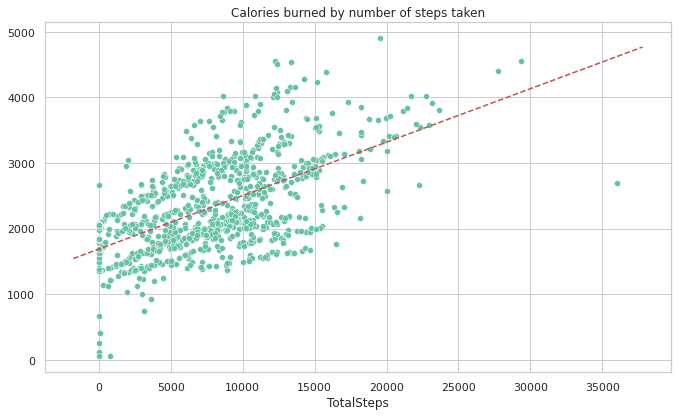

In [807]:
# fit a line for full daily activity and get intercept and slope 
def get_regression(full_info_activity, x ='TotalSteps', y = 'Calories'):
    X = full_info_activity[x].values.reshape((-1, 1))
    y = full_info_activity[y].values

    model = LinearRegression()
    model.fit(X, y)

    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    sns.scatterplot(data = full_info_activity, x= x, y =y)
    plt.title('Calories burned by number of steps taken')
    abline(model.coef_, model.intercept_);

    return (model.intercept_, model.coef_)

get_regression(full_info_activity)

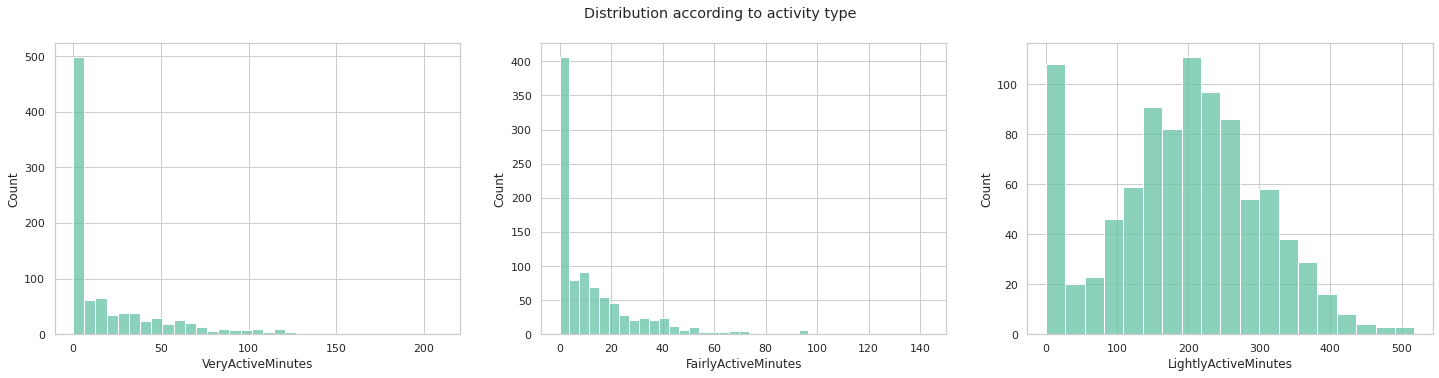

In [808]:
## Distribution of histogram plot as per activity 
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type')

sns.histplot(data = full_info_activity, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = full_info_activity, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = full_info_activity, x = 'LightlyActiveMinutes', ax = axes[2]);


There is an issue here: it is not clear if all users were using the tracker during the entire day in the analysed period. If a user logs the whole day, then the sum VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes should be equal to 1440 minutes (the total number of minutes in a day).



In [809]:
full_info_activity['TotalMinutes']=full_info_activity['VeryActiveMinutes']+full_info_activity['FairlyActiveMinutes']+full_info_activity['LightlyActiveMinutes']+full_info_activity['SedentaryMinutes']

In [810]:
## Checking logged user with total minutes of 1440 min  ~ 24 hours (in minutes)
logged_day_df=full_info_activity.loc[(full_info_activity['Calories']!=0) & (full_info_activity['TotalMinutes']==1440)]
print(f'No. of users logged whole day {len(logged_day_df)} out of {len(full_info_activity)}')

No. of users logged whole day 474 out of 936


In [811]:
## Checking logged user with NOT total minutes of 1440 min  ~ 24 hours (in minutes)
not_logged_day_df=full_info_activity.loc[(full_info_activity['Calories']!=0) & (full_info_activity['TotalMinutes']!=1440)]
print(f'No. of users did not logged whole day {len(not_logged_day_df)} out of {len(full_info_activity)}')

No. of users did not logged whole day 462 out of 936


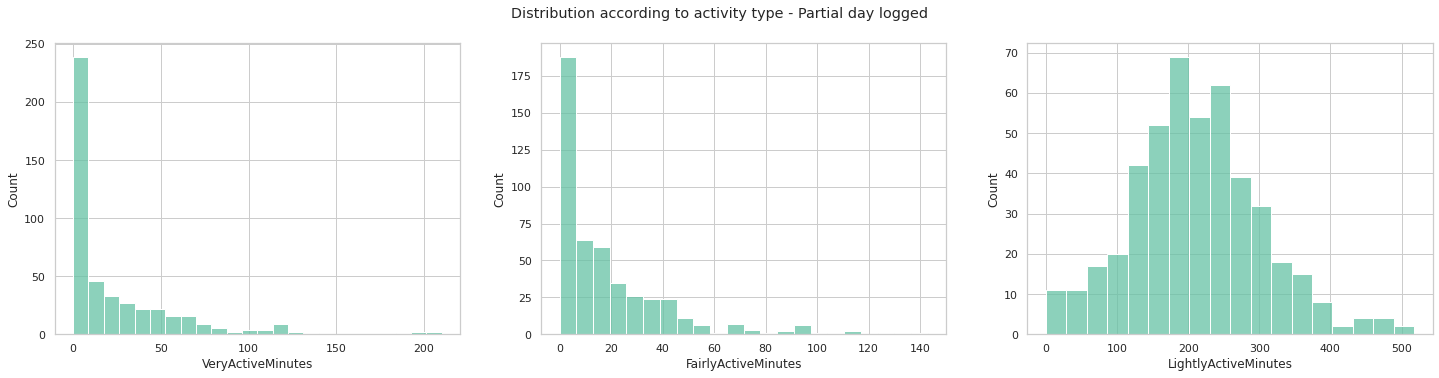

In [812]:
## Plotting not logged for whole day users by their activity type
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Partial day logged')

sns.histplot(data = not_logged_day_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = not_logged_day_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = not_logged_day_df, x = 'LightlyActiveMinutes', ax = axes[2]);

The LightlyActiveMinutes distribution is very symmetric with no peak at very few minutes of activity. Users who log the entire day may end up registering a lot of LightlyActiveMinutes while those who log only a part of the day might be registering only activities with higher demand.



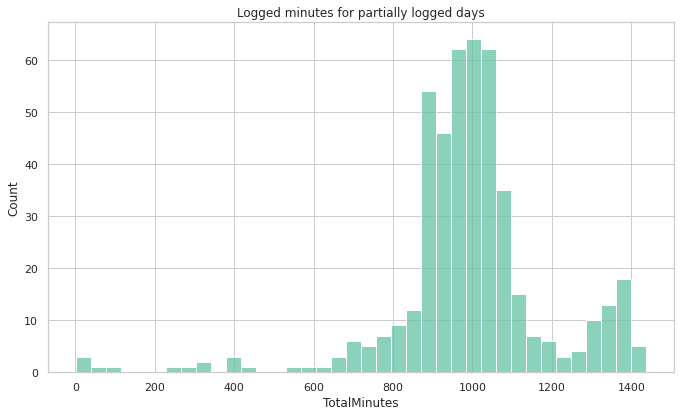

In [813]:
sns.histplot(data = not_logged_day_df, x = 'TotalMinutes')
plt.title('Logged minutes for partially logged days');

### Sleeping Habits 

Text(380, 30, '7h of sleep')

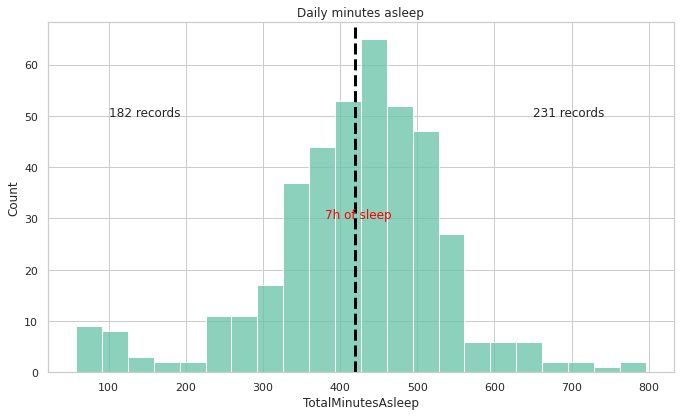

In [814]:

sns.histplot(data = df_sleepdata, x = 'TotalMinutesAsleep')
plt.title('Daily minutes asleep')

plt.axvline(420, 0, 65, color='black', ls = '--', lw = 3);

plt.annotate('182 records', (100,50))
plt.annotate('231 records', (650,50))
plt.annotate('7h of sleep', (380,30), color='red')


## Day of the week and behaviour of users 

In [815]:
activity_dist=activity_dist.reset_index()


In [816]:
activity_dist

Id  dow  avg_calories  avg_steps  avg_distance
0    1503960366    0       1939.25   13780.75        8.9550
1    1503960366    1       1967.80   13946.60        8.9200
2    1503960366    2       1868.80   12656.60        8.2280
3    1503960366    3       1481.60    9500.60        6.1020
4    1503960366    4       1826.25   11466.50        7.3975
..          ...  ...           ...        ...           ...
223  8877689391    2       3672.40   19705.40       16.8400
224  8877689391    3       3082.60   15503.00       12.9380
225  8877689391    4       3518.50   15785.00       12.5525
226  8877689391    5       4244.50   20150.75       16.8925
227  8877689391    6       3158.25   13352.00       10.2600

[228 rows x 5 columns]

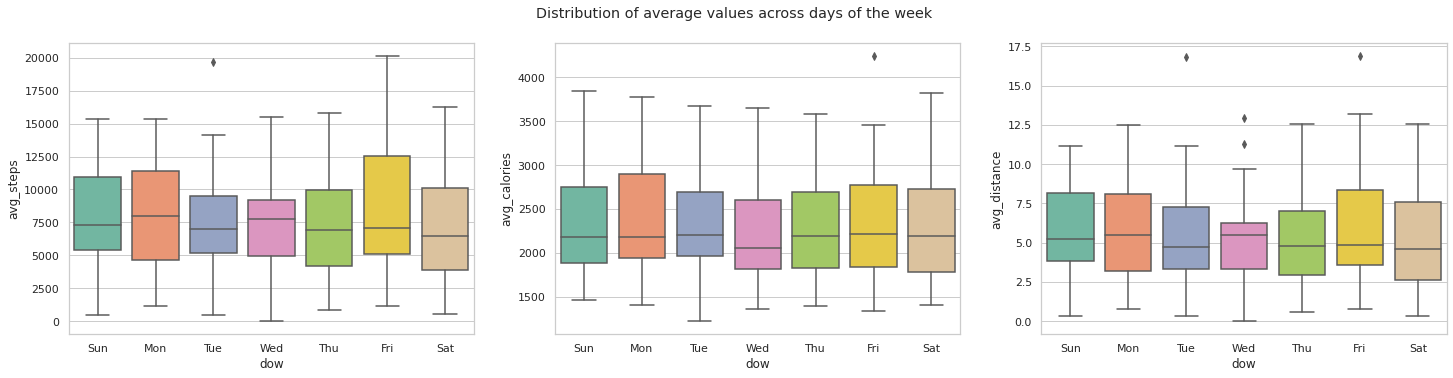

In [817]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.boxplot(x="dow", y="avg_steps", data=activity_dist, ax=axes[0]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);
sns.boxplot(x="dow", y="avg_calories", data=activity_dist, ax=axes[1]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);
sns.boxplot(x="dow", y="avg_distance", data=activity_dist, ax=axes[2]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);


In [818]:
full_info_activity

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                     13                   328               728      1985   
1                     19                   217               776      1797   
2                     11                   181              1218      1776   
3                     34                   209               726      1745   
4                     10                   221               773      1863   
..                   ...                   ...               ...       ...   
935                    4                   245              1174      2847   
936                   19                   217              1131      3710   
937                   11                   224              1187      2832   
938                   12                   213              1127      3832   
939                    1                   137               770      1849   

     dow  TotalMinutes  
0      1          1094  
1      2          1033  
2      3          1440  
3      4           998  
4      5          1040  
..   ...           ...  
935    6          1440  
936    0          1440  
937    1          1440  
938    2          1440  
939    3           931  

[936 rows x 17 columns]

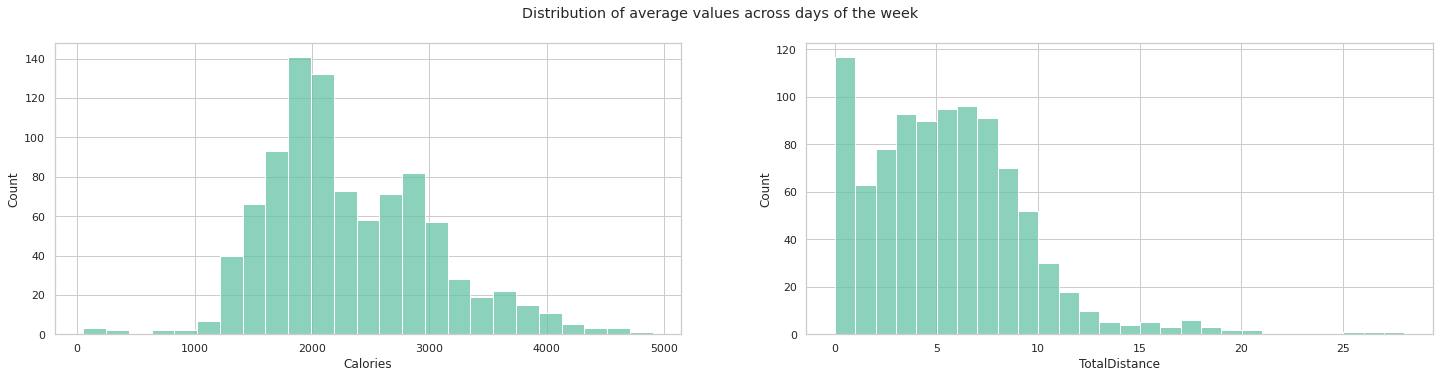

In [819]:

# distribution of calories and distance
fig, axes = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.histplot(data=full_info_activity, x="Calories", ax = axes[0]);

sns.histplot(data=full_info_activity, x="TotalDistance", ax = axes[1]);


How do sedentary minutes change in weekends?

In [820]:
df_daily_activity['weekend'] = np.where((df_daily_activity['dow']==0) | (df_daily_activity['dow']==6), 1, 0)

In [821]:
df_daily_activity['weekend'] = np.where(df_daily_activity['dow']==6, 1, 0)

In [822]:
weekend_check=df_daily_activity[['Id',
	'ActivityDate',
	'SedentaryMinutes',
	'VeryActiveMinutes',
	'FairlyActiveMinutes',
	'LightlyActiveMinutes',
	'Calories',
	'TotalSteps',
	'TotalDistance','weekend']]

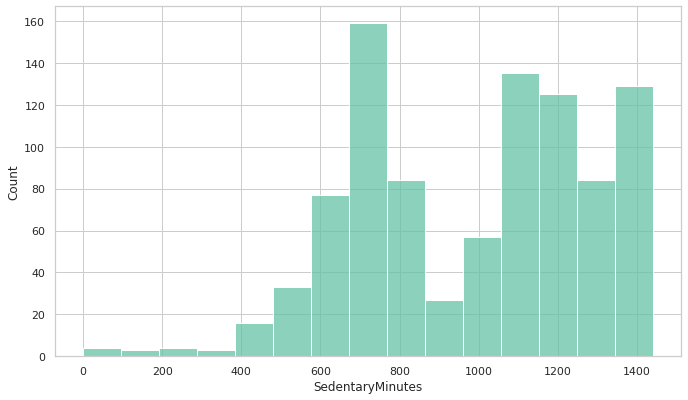

In [823]:
sns.histplot(data= weekend_check, x = 'SedentaryMinutes');


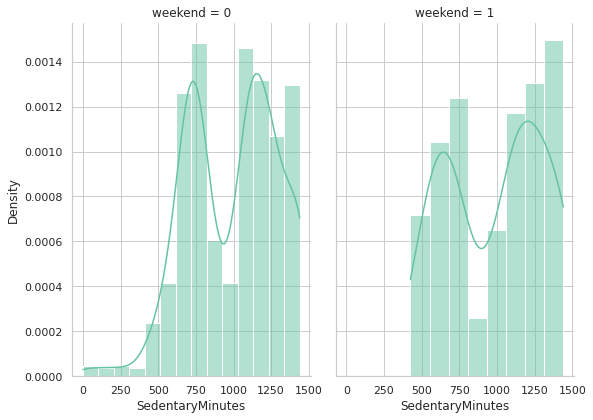

In [824]:

g = sns.FacetGrid(weekend_check, col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density');

Distiguishing Groups as per types of users 

In [825]:
avg_sed_minutes=df_daily_activity[['Id','SedentaryMinutes']]
avg_sed_minutes

Id  SedentaryMinutes
0    1503960366               728
1    1503960366               776
2    1503960366              1218
3    1503960366               726
4    1503960366               773
..          ...               ...
935  8877689391              1174
936  8877689391              1131
937  8877689391              1187
938  8877689391              1127
939  8877689391               770

[940 rows x 2 columns]

In [826]:
avg_sed_minutes=avg_sed_minutes.groupby(['Id'])['SedentaryMinutes'].mean()

In [827]:
avg_sed_minutes=avg_sed_minutes.reset_index()

In [828]:
avg_sed_minutes=avg_sed_minutes.sort_values(by='SedentaryMinutes',ascending=False)

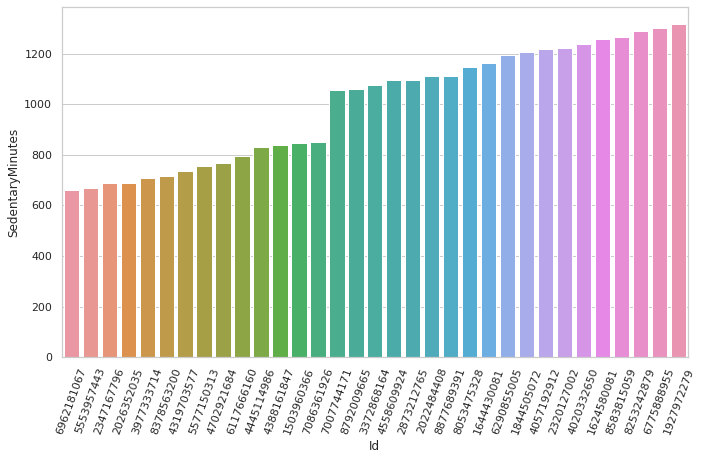

In [829]:
sns.barplot(data = avg_sed_minutes,
            x = 'Id', y = 'SedentaryMinutes',
            order=avg_sed_minutes.sort_values('SedentaryMinutes',ascending = True)['Id'])
plt.xticks(rotation=70);


In [830]:
sedMinAvg=df_daily_activity['SedentaryMinutes'].mean()
sedMinAvg

991.2106382978724

Users Above are those who are above Sedentary minutes average

Rows in group 0 (Less Sedentary group):
416
Rows in group 1 (More Sedentary group):
524
Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
19


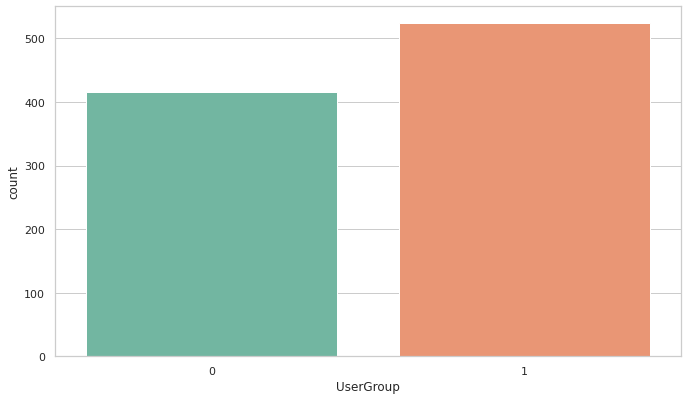

In [831]:
def is_above(user):
    '''Returns 1 if user has average SedentaryMinutes above the total average and 0 otherwise'''
    return int(avg_sed_minutes[avg_sed_minutes['Id']==user]['SedentaryMinutes'].values[0] > sedMinAvg)

weekend_check['UserGroup'] = weekend_check['Id'].apply(is_above)

print(f'Rows in group 0 (Less Sedentary group):')
print(len(weekend_check[weekend_check['UserGroup']==0]))
print(f'Rows in group 1 (More Sedentary group):')
print(len(weekend_check[weekend_check['UserGroup']==1]))

print('Distinct users in group 0 (Less Sedentary group)')
print(weekend_check[weekend_check['UserGroup']==0]['Id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(weekend_check[weekend_check['UserGroup']==1]['Id'].nunique())

sns.countplot(data=weekend_check, x = 'UserGroup');

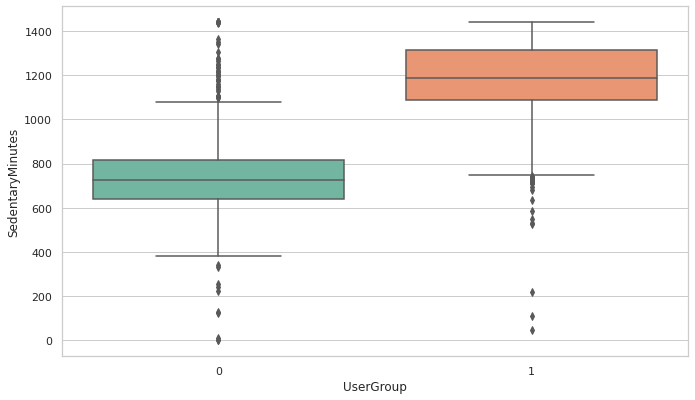

In [832]:
sns.boxplot(x="UserGroup", y="SedentaryMinutes", data=weekend_check);

What are the sleeping habits for each user group?

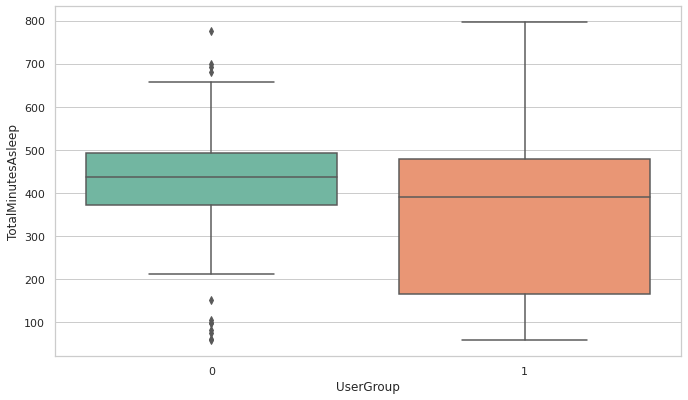

In [833]:
df_sleepdata['UserGroup'] = df_sleepdata['Id'].apply(is_above)
sns.boxplot(x="UserGroup", y="TotalMinutesAsleep", data=df_sleepdata);

Count of User groups and their sleeping habits 

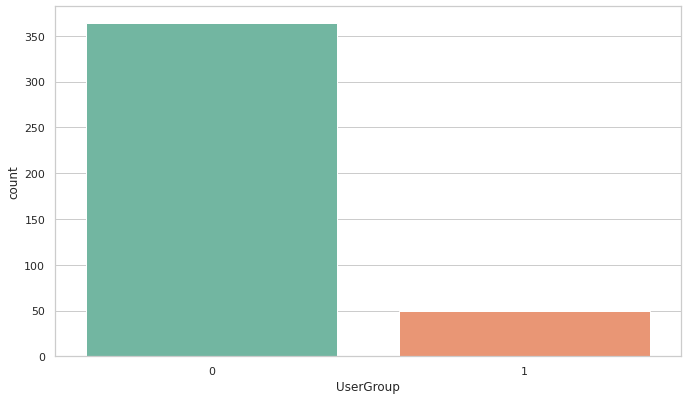

In [834]:
sns.countplot(data = df_sleepdata, x = 'UserGroup');

In [835]:
df_sleepdata['UserGroup'].value_counts()

0    364
1     49
Name: UserGroup, dtype: int64

In [836]:
print('Distinct users in group 0 (Less Sedentary group)')
print(df_sleepdata[df_sleepdata['UserGroup']==0]['Id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(df_sleepdata[df_sleepdata['UserGroup']==1]['Id'].nunique())

Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
10


## Random Forest and XgBoost

In [837]:
# Joining two tables for results ( # Data engineerign ) Daily Activity and Sleep Data
fitbit_df=pd.merge(df_daily_activity,df_sleepdata,left_on=['Id','ActivityDate'],right_on=['Id','SleepDay'])

In [838]:
fitbit_df=fitbit_df[['Id','ActivityDate','SedentaryMinutes','Calories','TotalSteps','TotalMinutesAsleep','TotalTimeInBed']]

In [839]:
fitbit_df

Id ActivityDate  SedentaryMinutes  Calories  TotalSteps  \
0    1503960366   2016-04-12               728      1985       13162   
1    1503960366   2016-04-13               776      1797       10735   
2    1503960366   2016-04-15               726      1745        9762   
3    1503960366   2016-04-16               773      1863       12669   
4    1503960366   2016-04-17               539      1728        9705   
..          ...          ...               ...       ...         ...   
408  8792009665   2016-04-30               749      2896        7174   
409  8792009665   2016-05-01               834      1962        1619   
410  8792009665   2016-05-02               916      2015        1831   
411  8792009665   2016-05-03               739      2297        2421   
412  8792009665   2016-05-04               848      2067        2283   

     TotalMinutesAsleep  TotalTimeInBed  
0                   327             346  
1                   384             407  
2                   412             442  
3                   340             367  
4                   700             712  
..                  ...             ...  
408                 343             360  
409                 503             527  
410                 415             423  
411                 516             545  
412                 439             463  

[413 rows x 7 columns]

In [840]:
fitbit_df[fitbit_df.isna()].count()

Id                    0
ActivityDate          0
SedentaryMinutes      0
Calories              0
TotalSteps            0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [841]:
# drop activity date because this is not a time series analysis
# drop id since it is not relevant
fitbit_df = fitbit_df.drop(columns=['Id', 'ActivityDate'])

# The resulting combined dataframe looks like this
fitbit_df.head()


SedentaryMinutes  Calories  TotalSteps  TotalMinutesAsleep  TotalTimeInBed
0               728      1985       13162                 327             346
1               776      1797       10735                 384             407
2               726      1745        9762                 412             442
3               773      1863       12669                 340             367
4               539      1728        9705                 700             712

Index(['SedentaryMinutes', 'TotalSteps', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Calories'],
      dtype='object')


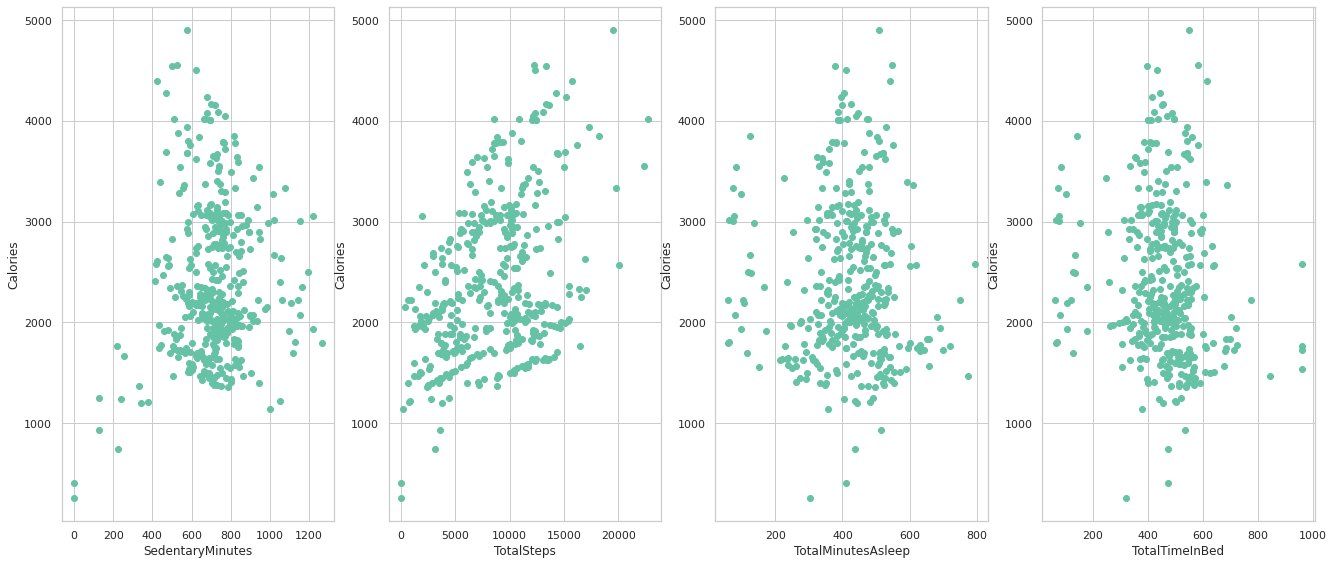

In [842]:
## moving calories to last column to make things easy 
column_to_move = fitbit_df.pop("Calories")
fitbit_df.insert(4, "Calories", column_to_move)
print(fitbit_df.columns)

# Define a function to plot the scatterplots of the relationships between 
# all independent variables and the dependent variable
def plot_relationships(df, num_cols):
    variables = df.columns
    
    # assume that the dependent variable is in the last column
    dep_var = variables[-1]
    ind_var = variables[:-1]
    figs = len(dep_var)
    num_cols = num_cols
    num_rows = round(figs / num_cols) + 1
    fig = 1
    plt.figure(figsize=(20,30))
    # Loop through all independent variables and create the scatter plot
    for i in ind_var:
        pltfignums = [str(num_rows), str(num_cols), str(fig)]
        pltfig = int(''.join(pltfignums))
        plt.subplot(pltfig)
        plt.scatter(df[i], df[dep_var])
        plt.xlabel(str(i))
        plt.ylabel(str(dep_var))
        fig +=1

plot_relationships(fitbit_df,4)

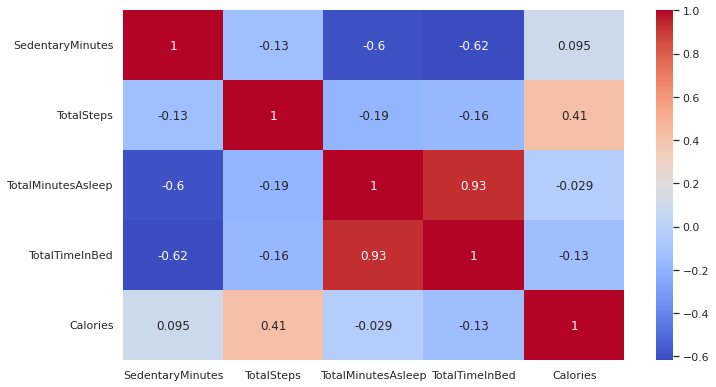

In [843]:
# Plot the correlations as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(fitbit_df.corr(), annot=True, cmap='coolwarm', fmt='.2g')

In [844]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(fitbit_df.iloc[:,:-1], 
                                                              fitbit_df['Calories'], 
                                                              test_size=0.2, 
                                                              random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)

In [845]:
# Scoring function to use later to find different Accuracy and Error rates of algos 
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    

The Lasso Regression algorithm indicates we may not face any major multicollinearity issue by including all of the features in our models.


Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.


Text(0, 0.5, 'Coefficients')

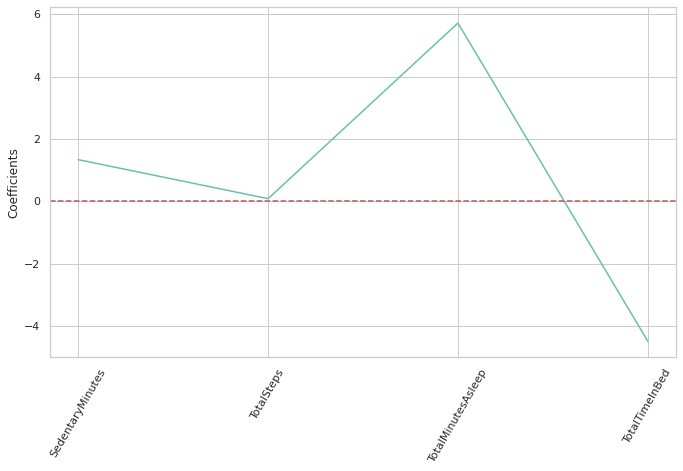

In [846]:
# feature selection with lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

plt.figure(figsize=(10, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')


XGBoost

In [847]:
## XGBoost Regressor 

xgb_regressor = XGBRegressor(random_state=42)
xgb = xgb_regressor.fit(X_train, y_train)

scoring(xgb, X_valid, y_valid)


[22:52:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Performance
Mean Absolute Error: 542.0950.
Mean Squared Error: 460604.8582.
R^2 Score = 0.2707.
Accuracy = 76.06%.


Random Forest

In [848]:

rf_regressor = rf_sk(random_state=42)
rf = rf_regressor.fit(X_train, y_train)

scoring(rf, X_valid, y_valid)

Model Performance
Mean Absolute Error: 506.9816.
Mean Squared Error: 407747.2590.
R^2 Score = 0.3544.
Accuracy = 77.49%.


In [849]:

# Define a function that compares the CV perfromance of a set of predetrmined models 
def cv_comparison(models, X, y, cv):
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs


### Hyper Parameter Tuning 

In [850]:
# Create the models to be tested
rf_reg = rf_sk(random_state=42)
xgb_reg = xgb_regressor = XGBRegressor(random_state=42)

models = [rf_reg, xgb_reg]

# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)

comp


[22:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomForestRegressor(random_state=42)  \
Mean Absolute Error                                471.8517   
Mean Squared Error                              371613.2164   
R^2                                                  0.3468   
Accuracy                                            80.4681   

                     XGBRegressor(random_state=42)  
Mean Absolute Error                       485.1102  
Mean Squared Error                     383394.9792  
R^2                                         0.3281  
Accuracy                                   79.9193

In [851]:

r2_comp = pd.DataFrame(r2s, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
                                                         '4th Fold'])

r2_comp['Average'] = np.round(r2_comp.mean(axis=1),4)

r2_comp

1st Fold  2nd Fold  3rd Fold  \
RandomForestRegressor(random_state=42)    0.4913    0.2705    0.2859   
XGBRegressor(random_state=42)             0.4614    0.2196    0.3218   

                                        4th Fold  Average  
RandomForestRegressor(random_state=42)    0.3394   0.3468  
XGBRegressor(random_state=42)             0.3095   0.3281

In [852]:
# Set hyperparameters possibilities for tuning Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
rf_max_depth.append(None)
rf_max_features = ['auto', 'sqrt', 'log2']
rf_criterion = ['mse', 'mae']
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]
rf_min_impurity_decrease = [0.0, 0.05, 0.1]
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

rf_grid


{'n_estimators': [200, 400, 600, 800, 1000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['mse', 'mae'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'bootstrap': [True, False]}

In [853]:
# Tune the Random Forest Model
rf_base = rf_sk()
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

rf_random.fit(X_train_temp, y_train_temp)

rf_random.best_estimator_


Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomForestRegressor(criterion='mae', max_depth=20, max_features='log2',
                      min_impurity_decrease=0.05, n_estimators=200)

In [854]:
# Set hyperparameters possibilities for tuning XGBoost
xgb_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']
xgb_eta=[x for x in (0.1,0.2,0.4,0.5)]
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators':xgb_n_estimators,
            'max_depth':xgb_max_depth,
            'min_child_weight':xgb_min_child_weight,
            'tree_method':xgb_tree_method,
            'eta ':xgb_eta,
            'gamma':xgb_gamma,
            'objective':xgb_objective}

In [855]:
xgb_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
 'eta ': [0.1, 0.2, 0.4, 0.5],
 'gamma': [0, 0, 0, 0, 0, 0],
 'objective': ['reg:squarederror', 'reg:squaredlogerror']}

In [856]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

xgb_base = XGBRegressor()

xgb_random = RandomizedSearchCV(estimator=xgb_base, param_distributions=xgb_grid, 
                             n_iter=200, cv=3, verbose=2, 
                           random_state=42, n_jobs=-1)

xgb_random.fit(X_train_temp, y_train_temp)

xgb_random.best_params_


Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'tree_method': 'approx',
 'objective': 'reg:squarederror',
 'n_estimators': 1000,
 'min_child_weight': 2,
 'max_depth': 12,
 'gamma': 0,
 'eta ': 0.4}

In [857]:

# Create the final Random Forest
rf_final = rf_sk(n_estimators = 600,
                                 min_samples_split = 4,
                                 min_impurity_decrease = 0.05,
                                 max_features = 'sqrt',
                                 max_depth = 15,
                                 criterion = 'mae',
                                 bootstrap = True,
                                 random_state = 42)

# Create the fnal Extreme Gradient Booster
xgb_final = XGBRegressor(tree_method = 'approx',
                         objective = 'reg:squarederror',
                         n_estimators = 1000,
                         min_child_weight = 2,
                         max_depth = 12,
                         gamma = 0,
                         eta = 0.4,
                         random_state = 42)

# Train the models using 80% of the original data
mlr_final.fit(X_train_temp, y_train_temp)
xgb_final.fit(X_train_temp, y_train_temp)


XGBRegressor(eta=0.4, max_depth=12, min_child_weight=2, n_estimators=1000,
             objective='reg:squarederror', random_state=42,
             tree_method='approx')

In [858]:
rf_final.fit(X_train_temp, y_train_temp)


RandomForestRegressor(criterion='mae', max_depth=15, max_features='sqrt',
                      min_impurity_decrease=0.05, min_samples_split=4,
                      n_estimators=600, random_state=42)

In [859]:

# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [860]:

# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)

comp



[23:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomForestRegressor(random_state=42)  \
Mean Absolute Error                                471.8517   
Mean Squared Error                              371613.2164   
R^2                                                  0.3468   
Accuracy                                            80.4681   

                     XGBRegressor(random_state=42)  
Mean Absolute Error                       485.1102  
Mean Squared Error                     383394.9792  
R^2                                         0.3281  
Accuracy                                   79.9193

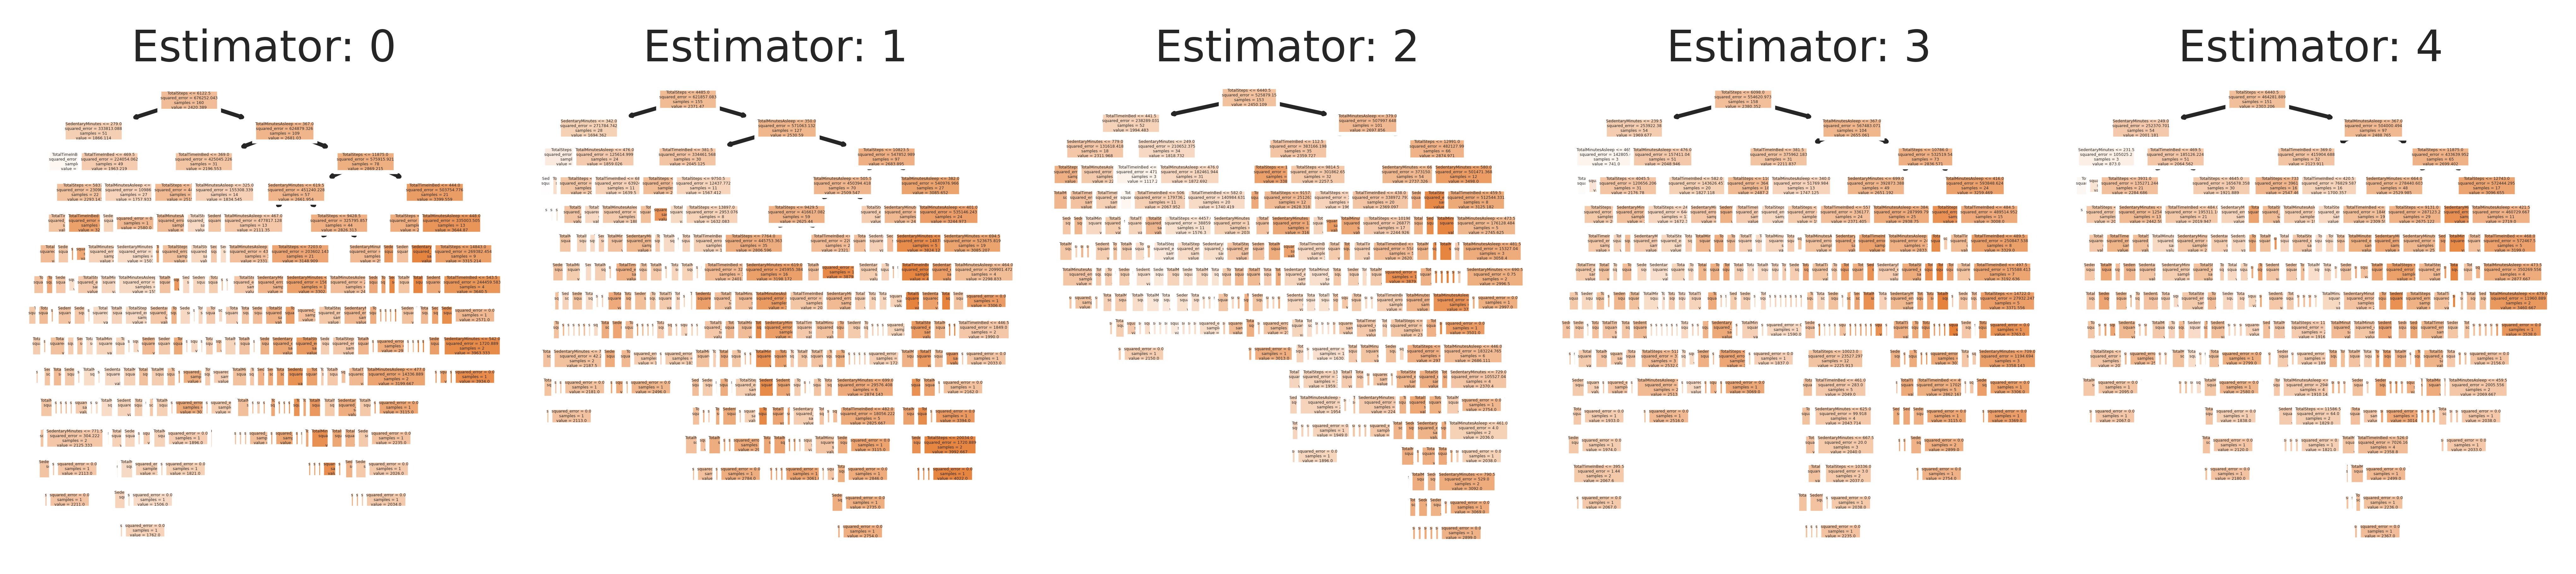

In [861]:


# let's take a look at the first 5 estimators in the Random Forest
fn=['SedentaryMinutes', 'TotalSteps', 'TotalMinutesAsleep',
       'TotalTimeInBed']
cn=['Calories']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)


# K-Mean Clustering World 

In [862]:
df = pd.read_excel("FitbitAnalysis.xlsx")
df.head()

Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  \
0  1503960366   4/12/2016               728                   328   
1  1503960366   4/13/2016               776                   217   
2  1503960366   4/14/2016              1218                   181   
3  1503960366   4/15/2016               726                   209   
4  1503960366   4/16/2016               773                   221   

   FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                   13                 25                      0.0   
1                   19                 21                      0.0   
2                   11                 30                      0.0   
3                   34                 29                      0.0   
4                   10                 36                      0.0   

   LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  \
0                 6.06                      0.55                1.88   
1                 4.71                      0.69                1.57   
2                 3.91                      0.40                2.44   
3                 2.83                      1.26                2.14   
4                 5.04                      0.41                2.71   

   StepTotal  TotalDistance  Calories  
0      13162           8.50      1985  
1      10735           6.97      1797  
2      10460           6.74      1776  
3       9762           6.28      1745  
4      12669           8.16      1863

In [863]:
df.describe()

Id  SedentaryMinutes  LightlyActiveMinutes  \
count  9.400000e+02        940.000000            940.000000   
mean   4.855407e+09        991.210638            192.812766   
std    2.424805e+09        301.267437            109.174700   
min    1.503960e+09          0.000000              0.000000   
25%    2.320127e+09        729.750000            127.000000   
50%    4.445115e+09       1057.500000            199.000000   
75%    6.962181e+09       1229.500000            264.000000   
max    8.877689e+09       1440.000000            518.000000   

       FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
count           940.000000         940.000000               940.000000   
mean             13.564894          21.164894                 0.001606   
std              19.987404          32.844803                 0.007346   
min               0.000000           0.000000                 0.000000   
25%               0.000000           0.000000                 0.000000   
50%               6.000000           4.000000                 0.000000   
75%              19.000000          32.000000                 0.000000   
max             143.000000         210.000000                 0.110000   

       LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  \
count           940.000000                940.000000          940.000000   
mean              3.340819                  0.567543            1.502681   
std               2.040655                  0.883580            2.658941   
min               0.000000                  0.000000            0.000000   
25%               1.945000                  0.000000            0.000000   
50%               3.365000                  0.240000            0.210000   
75%               4.782500                  0.800000            2.052500   
max              10.710000                  6.480000           21.920000   

          StepTotal  TotalDistance     Calories  
count    940.000000     940.000000   940.000000  
mean    7637.910638       5.489702  2303.609574  
std     5087.150742       3.924606   718.166862  
min        0.000000       0.000000     0.000000  
25%     3789.750000       2.620000  1828.500000  
50%     7405.500000       5.245000  2134.000000  
75%    10727.000000       7.712500  2793.250000  
max    36019.000000      28.030001  4900.000000

In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
 10  StepTotal                 940 non-null    int64  
 11  TotalDistance             940 non-null    float64
 12  Calories                  940 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 95.6+ KB


In [865]:
df.drop_duplicates()

Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  \
0    1503960366   4/12/2016               728                   328   
1    1503960366   4/13/2016               776                   217   
2    1503960366   4/14/2016              1218                   181   
3    1503960366   4/15/2016               726                   209   
4    1503960366   4/16/2016               773                   221   
..          ...         ...               ...                   ...   
935  8877689391    5/8/2016              1174                   245   
936  8877689391    5/9/2016              1131                   217   
937  8877689391   5/10/2016              1187                   224   
938  8877689391   5/11/2016              1127                   213   
939  8877689391   5/12/2016               770                   137   

     FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                     13                 25                     0.00   
1                     19                 21                     0.00   
2                     11                 30                     0.00   
3                     34                 29                     0.00   
4                     10                 36                     0.00   
..                   ...                ...                      ...   
935                    4                 17                     0.00   
936                   19                 73                     0.05   
937                   11                 18                     0.00   
938                   12                 88                     0.00   
939                    1                 23                     0.00   

     LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  \
0                   6.06                      0.55                1.88   
1                   4.71                      0.69                1.57   
2                   3.91                      0.40                2.44   
3                   2.83                      1.26                2.14   
4                   5.04                      0.41                2.71   
..                   ...                       ...                 ...   
935                 6.80                      0.20                1.08   
936                 6.24                      0.80               11.10   
937                 6.28                      0.46                1.35   
938                 5.89                      0.41               13.22   
939                 4.25                      0.04                1.82   

     StepTotal  TotalDistance  Calories  
0        13162       8.500000      1985  
1        10735       6.970000      1797  
2        10460       6.740000      1776  
3         9762       6.280000      1745  
4        12669       8.160000      1863  
..         ...            ...       ...  
935      10686       8.110000      2847  
936      20226      18.250000      3710  
937      10733       8.150000      2832  
938      21420      19.559999      3832  
939       8064       6.120000      1849  

[940 rows x 13 columns]

In [866]:
#CHecking for null
df.isna().sum()

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
StepTotal                   0
TotalDistance               0
Calories                    0
dtype: int64

In [867]:
# Creating an year column from releas date
df['month'] = df.ActivityDay.apply(lambda x: x.split('/')[0])
df['day'] = df.ActivityDay.apply(lambda x: x.split('/')[1])
df['year'] = df.ActivityDay.apply(lambda x: x.split('/')[2])
df.head()

Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  \
0  1503960366   4/12/2016               728                   328   
1  1503960366   4/13/2016               776                   217   
2  1503960366   4/14/2016              1218                   181   
3  1503960366   4/15/2016               726                   209   
4  1503960366   4/16/2016               773                   221   

   FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                   13                 25                      0.0   
1                   19                 21                      0.0   
2                   11                 30                      0.0   
3                   34                 29                      0.0   
4                   10                 36                      0.0   

   LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  \
0                 6.06                      0.55                1.88   
1                 4.71                      0.69                1.57   
2                 3.91                      0.40                2.44   
3                 2.83                      1.26                2.14   
4                 5.04                      0.41                2.71   

   StepTotal  TotalDistance  Calories month day  year  
0      13162           8.50      1985     4  12  2016  
1      10735           6.97      1797     4  13  2016  
2      10460           6.74      1776     4  14  2016  
3       9762           6.28      1745     4  15  2016  
4      12669           8.16      1863     4  16  2016

In [868]:
## Transforming and merging of data 
df1 = df[["Id","Calories","SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes","SedentaryActiveDistance",
                              "LightActiveDistance","ModeratelyActiveDistance","VeryActiveDistance","StepTotal","TotalDistance"]]
df1.head()

Id  Calories  SedentaryMinutes  LightlyActiveMinutes  \
0  1503960366      1985               728                   328   
1  1503960366      1797               776                   217   
2  1503960366      1776              1218                   181   
3  1503960366      1745               726                   209   
4  1503960366      1863               773                   221   

   FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                   13                 25                      0.0   
1                   19                 21                      0.0   
2                   11                 30                      0.0   
3                   34                 29                      0.0   
4                   10                 36                      0.0   

   LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  \
0                 6.06                      0.55                1.88   
1                 4.71                      0.69                1.57   
2                 3.91                      0.40                2.44   
3                 2.83                      1.26                2.14   
4                 5.04                      0.41                2.71   

   StepTotal  TotalDistance  
0      13162           8.50  
1      10735           6.97  
2      10460           6.74  
3       9762           6.28  
4      12669           8.16

## Hyperparameter Tuning:- Corelation matrix, data transformation and data standarization

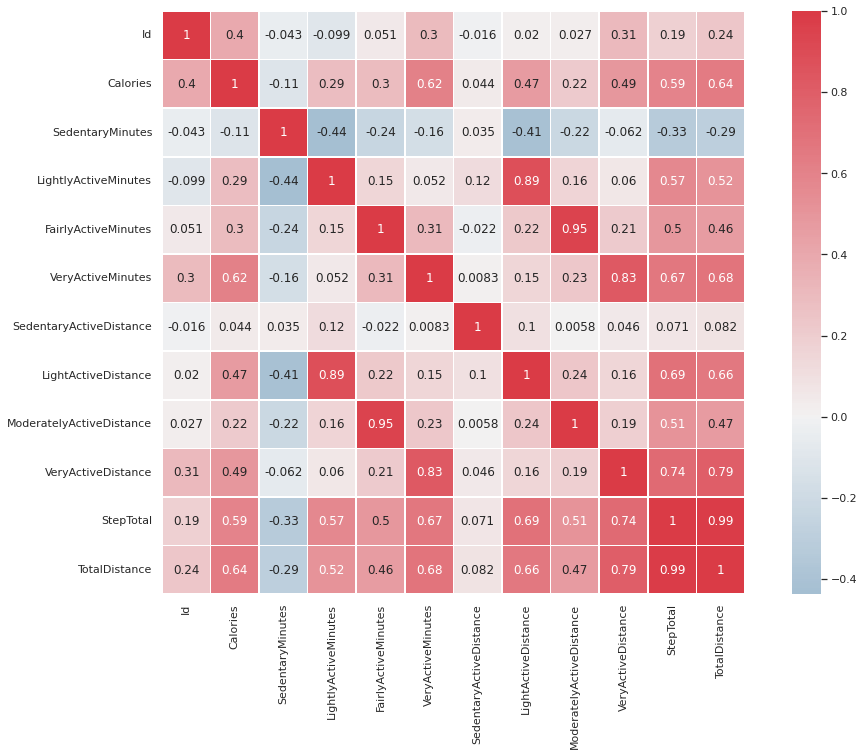

In [869]:
# Correlation Matrix for dataset
correlationMatrix = df1.corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(correlationMatrix, cmap=cmap, annot=True, vmax=1, center=0,
            square=True, linewidth=.5);

In [870]:
corr_matrix = df1.corr().abs()
corr_matrix

Id  Calories  SedentaryMinutes  \
Id                        1.000000  0.396671          0.043319   
Calories                  0.396671  1.000000          0.106973   
SedentaryMinutes          0.043319  0.106973          1.000000   
LightlyActiveMinutes      0.098754  0.286718          0.437104   
FairlyActiveMinutes       0.051158  0.297623          0.237446   
VeryActiveMinutes         0.303608  0.615838          0.164671   
SedentaryActiveDistance   0.015698  0.043652          0.035475   
LightActiveDistance       0.019629  0.466917          0.413552   
ModeratelyActiveDistance  0.026665  0.216790          0.221436   
VeryActiveDistance        0.308691  0.491959          0.061754   
StepTotal                 0.185721  0.591568          0.327484   
TotalDistance             0.241000  0.644962          0.288094   

                          LightlyActiveMinutes  FairlyActiveMinutes  \
Id                                    0.098754             0.051158   
Calories                              0.286718             0.297623   
SedentaryMinutes                      0.437104             0.237446   
LightlyActiveMinutes                  1.000000             0.148820   
FairlyActiveMinutes                   0.148820             1.000000   
VeryActiveMinutes                     0.051926             0.312420   
SedentaryActiveDistance               0.124185             0.022361   
LightActiveDistance                   0.885697             0.220129   
ModeratelyActiveDistance              0.162092             0.946934   
VeryActiveDistance                    0.059845             0.211730   
StepTotal                             0.569600             0.498693   
TotalDistance                         0.516300             0.462899   

                          VeryActiveMinutes  SedentaryActiveDistance  \
Id                                 0.303608                 0.015698   
Calories                           0.615838                 0.043652   
SedentaryMinutes                   0.164671                 0.035475   
LightlyActiveMinutes               0.051926                 0.124185   
FairlyActiveMinutes                0.312420                 0.022361   
VeryActiveMinutes                  1.000000                 0.008258   
SedentaryActiveDistance            0.008258                 1.000000   
LightActiveDistance                0.154966                 0.099503   
ModeratelyActiveDistance           0.225464                 0.005793   
VeryActiveDistance                 0.826681                 0.046117   
StepTotal                          0.667079                 0.070505   
TotalDistance                      0.681297                 0.082389   

                          LightActiveDistance  ModeratelyActiveDistance  \
Id                                   0.019629                  0.026665   
Calories                             0.466917                  0.216790   
SedentaryMinutes                     0.413552                  0.221436   
LightlyActiveMinutes                 0.885697                  0.162092   
FairlyActiveMinutes                  0.220129                  0.946934   
VeryActiveMinutes                    0.154966                  0.225464   
SedentaryActiveDistance              0.099503                  0.005793   
LightActiveDistance                  1.000000                  0.237847   
ModeratelyActiveDistance             0.237847                  1.000000   
VeryActiveDistance                   0.157669                  0.192986   
StepTotal                            0.692208                  0.507105   
TotalDistance                        0.662002                  0.470758   

                          VeryActiveDistance  StepTotal  TotalDistance  
Id                                  0.308691   0.185721       0.241000  
Calories                            0.491959   0.591568       0.644962  
SedentaryMinutes                    0.061754   0.327484       0.288094  
LightlyActiveMinutes                0.059845

In [871]:
## Getting uper values of correlation matrix greater than 0.90
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [872]:

df1.drop(to_drop, axis=1, inplace=True)

In [873]:
df1

Id  Calories  SedentaryMinutes  LightlyActiveMinutes  \
0    1503960366      1985               728                   328   
1    1503960366      1797               776                   217   
2    1503960366      1776              1218                   181   
3    1503960366      1745               726                   209   
4    1503960366      1863               773                   221   
..          ...       ...               ...                   ...   
935  8877689391      2847              1174                   245   
936  8877689391      3710              1131                   217   
937  8877689391      2832              1187                   224   
938  8877689391      3832              1127                   213   
939  8877689391      1849               770                   137   

     FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                     13                 25                     0.00   
1                     19                 21                     0.00   
2                     11                 30                     0.00   
3                     34                 29                     0.00   
4                     10                 36                     0.00   
..                   ...                ...                      ...   
935                    4                 17                     0.00   
936                   19                 73                     0.05   
937                   11                 18                     0.00   
938                   12                 88                     0.00   
939                    1                 23                     0.00   

     LightActiveDistance  VeryActiveDistance  StepTotal  
0                   6.06                1.88      13162  
1                   4.71                1.57      10735  
2                   3.91                2.44      10460  
3                   2.83                2.14       9762  
4                   5.04                2.71      12669  
..                   ...                 ...        ...  
935                 6.80                1.08      10686  
936                 6.24               11.10      20226  
937                 6.28                1.35      10733  
938                 5.89               13.22      21420  
939                 4.25                1.82       8064  

[940 rows x 10 columns]

In [874]:
# merging sedentary minutes lightly active, farily active , very active minutes  and keeping it in active minutes 
df1['ActiveMinutes'] = df['SedentaryMinutes'] + df['LightlyActiveMinutes'] + df['FairlyActiveMinutes'] + df['VeryActiveMinutes'] 

# dropping all the columns which are not in use from df1 
df2 = df1.drop(columns=['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes'])

In [875]:
# merging sedentary distance , light active + very active distance and putting in distance variable
df2['Distance'] = df['SedentaryActiveDistance'] + df['LightActiveDistance'] + df['VeryActiveDistance']

# dropping all the columns which are not in use from df2
df_final = df2.drop(columns=['SedentaryActiveDistance', 'LightActiveDistance', 'VeryActiveDistance'])

In [876]:
df_final

Id  Calories  StepTotal  ActiveMinutes  Distance
0    1503960366      1985      13162           1094      7.94
1    1503960366      1797      10735           1033      6.28
2    1503960366      1776      10460           1440      6.35
3    1503960366      1745       9762            998      4.97
4    1503960366      1863      12669           1040      7.75
..          ...       ...        ...            ...       ...
935  8877689391      2847      10686           1440      7.88
936  8877689391      3710      20226           1440     17.39
937  8877689391      2832      10733           1440      7.63
938  8877689391      3832      21420           1440     19.11
939  8877689391      1849       8064            931      6.07

[940 rows x 5 columns]

Data Standardization

Standard Scaler :  ( Now we know why industry loves this algo ) <br>
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 

In [877]:
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(df_final)

pd.DataFrame(data_scaled)

0         1         2         3         4
0   -1.382887 -0.443879  1.086469 -0.469367  0.860479
1   -1.382887 -0.705796  0.609130 -0.698871  0.398946
2   -1.382887 -0.735053  0.555044  0.832411  0.418408
3   -1.382887 -0.778241  0.417762 -0.830554  0.034724
4   -1.382887 -0.613846  0.989506 -0.672535  0.807653
..        ...       ...       ...       ...       ...
935  1.659689  0.757038  0.599493  0.832411  0.843797
936  1.659689  1.959348  2.475804  0.832411  3.487880
937  1.659689  0.736140  0.608737  0.832411  0.774289
938  1.659689  2.129316  2.710638  0.832411  3.966095
939  1.659689 -0.633351  0.083803 -1.082633  0.340559

[940 rows x 5 columns]

## K- Mean Clustering

In [878]:
class KMeansClustering:
    def __init__(self, X, number_of_clusters):
        self.K = number_of_clusters # cluster number
        self.max_iterations = 1000 # max number of iteration
        self.num_examples, self.number_of_features = X.shape
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.number_of_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate the distances of every point from the centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.number_of_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show() # visualize
        
    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # randomly initialize centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster function
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # prediction
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plotinng scatter plot 
        return y_pred
            
if __name__ == "__main__":
    np.random.seed(10)
    number_of_clusters = 3 # num of cluster
    X, _ = make_blobs(n_samples=1000, n_features=2, centers=number_of_clusters) # create dataset using make_blobs from sklearn datasets
    Kmeans = KMeansClustering(X, number_of_clusters)
    y_pred = Kmeans.fit(X)

In [879]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++') # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [880]:
kmeans.inertia_

3221.713956333616

Text(0, 0.5, 'Inertia')

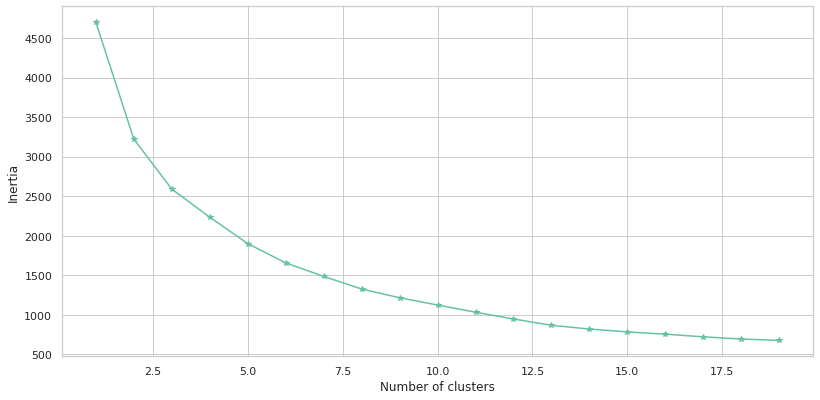

In [881]:
SSE = []
for i in range(1,20):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++') # iterate from range (1, 20)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [882]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [883]:
#Getting the Total Sum for each clusters
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    564
1    376
Name: cluster, dtype: int64

In [884]:
dataset = df_final.copy()
dataset["cluster"] = pred

## The clusters is Yellow represent Active People and Blue one are Inactive based on their daily activity.

In [885]:
#2d visuals for calories burn and Total Steps
x=['tab:Active','tab:Inactive']
fig = px.scatter(dataset, x="StepTotal", y="Calories", color='cluster', size_max=30,labels=x)
fig.show()



In [886]:
#3d visualization for ActiveMinutes, Calories and StepTotal
fig = px.scatter_3d(dataset, x="ActiveMinutes", y="Calories", z="StepTotal", color='cluster', size_max=30)
fig.show()

# Linear Regression Land

In [887]:
# Loading dailyActivityMerged data
X = pd.read_csv("dailyActivity_merged.csv")

print(X.shape)
X.head(10)


(940, 15)


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   
5  1503960366    4/17/2016        9705           6.48             6.48   
6  1503960366    4/18/2016       13019           8.59             8.59   
7  1503960366    4/19/2016       15506           9.88             9.88   
8  1503960366    4/20/2016       10544           6.68             6.68   
9  1503960366    4/21/2016        9819           6.34             6.34   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   
5                       0.0                3.19                      0.78   
6                       0.0                3.25                      0.64   
7                       0.0                3.53                      1.32   
8                       0.0                1.96                      0.48   
9                       0.0                1.34                      0.35   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   
5                 2.51                      0.0                 38   
6                 4.71                      0.0                 42   
7                 5.03                      0.0                 50   
8                 4.24                      0.0                 28   
9                 4.65                      0.0                 19   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863  
5                   20                   164               539      1728  
6                   16                   233              1149      1921  
7                   31                   264               775      2035  
8                   12                   205               818      1786  
9                    8                   211               838      1775

In [888]:
# Loading sleep data
Y= pd.read_csv("sleepDay_merged.csv")
Y.head(10)


Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   
5  1503960366  4/19/2016 12:00:00 AM                  1                 304   
6  1503960366  4/20/2016 12:00:00 AM                  1                 360   
7  1503960366  4/21/2016 12:00:00 AM                  1                 325   
8  1503960366  4/23/2016 12:00:00 AM                  1                 361   
9  1503960366  4/24/2016 12:00:00 AM                  1                 430   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  
5             320  
6             377  
7             364  
8             384  
9             449

Feature Engineering 

Feature Importance of X 

In [889]:
x=X.iloc[:,2:-2]

In [890]:
y=X.iloc[:,-1:]

[0.14372966 0.13102862 0.13088007 0.00799771 0.07174003 0.07311045
 0.12842522 0.02377764 0.07324376 0.07350036 0.1425665 ]


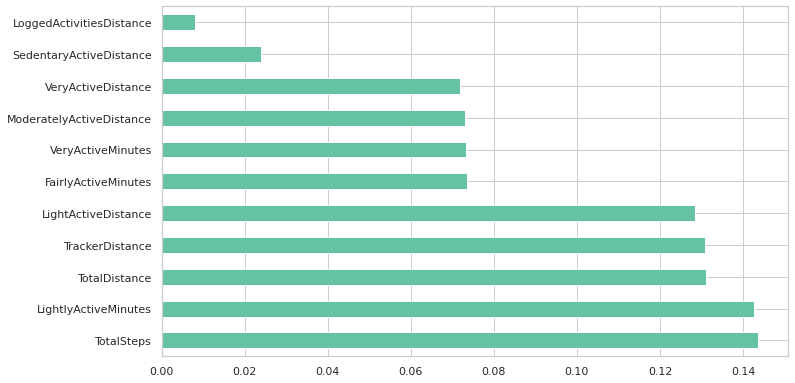

In [891]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [892]:
# Convert time_stamp column to datetime object
X["ActivityDate"] = pd.to_datetime(X["ActivityDate"])


#Convert ActivityDate to %Y-%b-%d format
X["ActivityDate"].dt.strftime("%Y-%b-%d")


print(X.shape)

X.head(10)

(940, 15)


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   
5  1503960366   2016-04-17        9705           6.48             6.48   
6  1503960366   2016-04-18       13019           8.59             8.59   
7  1503960366   2016-04-19       15506           9.88             9.88   
8  1503960366   2016-04-20       10544           6.68             6.68   
9  1503960366   2016-04-21        9819           6.34             6.34   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   
5                       0.0                3.19                      0.78   
6                       0.0                3.25                      0.64   
7                       0.0                3.53                      1.32   
8                       0.0                1.96                      0.48   
9                       0.0                1.34                      0.35   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   
5                 2.51                      0.0                 38   
6                 4.71                      0.0                 42   
7                 5.03                      0.0                 50   
8                 4.24                      0.0                 28   
9                 4.65                      0.0                 19   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863  
5                   20                   164               539      1728  
6                   16                   233              1149      1921  
7                   31                   264               775      2035  
8                   12                   205               818      1786  
9                    8                   211               838      1775

In [893]:
X["ActivityDate"] = pd.to_datetime(X["ActivityDate"])

X["Weekend"] = X["ActivityDate"].dt.weekday >= 5
# display the dataframe
print(X.shape)
X.head(10)


(940, 16)


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   
5  1503960366   2016-04-17        9705           6.48             6.48   
6  1503960366   2016-04-18       13019           8.59             8.59   
7  1503960366   2016-04-19       15506           9.88             9.88   
8  1503960366   2016-04-20       10544           6.68             6.68   
9  1503960366   2016-04-21        9819           6.34             6.34   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   
5                       0.0                3.19                      0.78   
6                       0.0                3.25                      0.64   
7                       0.0                3.53                      1.32   
8                       0.0                1.96                      0.48   
9                       0.0                1.34                      0.35   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   
5                 2.51                      0.0                 38   
6                 4.71                      0.0                 42   
7                 5.03                      0.0                 50   
8                 4.24                      0.0                 28   
9                 4.65                      0.0                 19   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   13                   328               728      1985   
1                   19                   217               776      1797   
2                   11                   181              1218      1776   
3                   34                   209               726      1745   
4                   10                   221               773      1863   
5                   20                   164               539      1728   
6                   16                   233              1149      1921   
7                   31                   264               775      2035   
8                   12                   205               818      1786   
9                    8                   211               838      1775   

   Weekend  
0    False  
1    False  
2    False  
3    False  
4     True  
5     True  
6    False  
7    False  
8    False  
9    False

In [894]:
X["day"]=X["ActivityDate"].dt.day
X["Year"]=X["ActivityDate"].dt.year
X["Month"]=X["ActivityDate"].dt.month

print(X.shape)

X.head(10)

(940, 19)


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   
5  1503960366   2016-04-17        9705           6.48             6.48   
6  1503960366   2016-04-18       13019           8.59             8.59   
7  1503960366   2016-04-19       15506           9.88             9.88   
8  1503960366   2016-04-20       10544           6.68             6.68   
9  1503960366   2016-04-21        9819           6.34             6.34   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   
5                       0.0                3.19                      0.78   
6                       0.0                3.25                      0.64   
7                       0.0                3.53                      1.32   
8                       0.0                1.96                      0.48   
9                       0.0                1.34                      0.35   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   
5                 2.51                      0.0                 38   
6                 4.71                      0.0                 42   
7                 5.03                      0.0                 50   
8                 4.24                      0.0                 28   
9                 4.65                      0.0                 19   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   13                   328               728      1985   
1                   19                   217               776      1797   
2                   11                   181              1218      1776   
3                   34                   209               726      1745   
4                   10                   221               773      1863   
5                   20                   164               539      1728   
6                   16                   233              1149      1921   
7                   31                   264               775      2035   
8                   12                   205               818      1786   
9                    8                   211               838      1775   

   Weekend  day  Year  Month  
0    False   12  2016      4  
1    False   13  2016      4  
2    False   14  2016      4  
3    False   15  2016      4  
4     True   16  2016      4  
5     True   17  2016      4  
6    False   18  2016      4  
7    False   19  2016      4  
8    False   20  2016      4  
9    False   21  2016      4

In [895]:
# Convert time_stamp column to datetime object
Y["SleepDay"] = pd.to_datetime(Y["SleepDay"])
# Code to extract Date from SleepDay 
Y["SleepDay"].dt.date
print(Y.shape)
Y.head(10)

(413, 5)


Id   SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366 2016-04-12                  1                 327   
1  1503960366 2016-04-13                  2                 384   
2  1503960366 2016-04-15                  1                 412   
3  1503960366 2016-04-16                  2                 340   
4  1503960366 2016-04-17                  1                 700   
5  1503960366 2016-04-19                  1                 304   
6  1503960366 2016-04-20                  1                 360   
7  1503960366 2016-04-21                  1                 325   
8  1503960366 2016-04-23                  1                 361   
9  1503960366 2016-04-24                  1                 430   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  
5             320  
6             377  
7             364  
8             384  
9             449

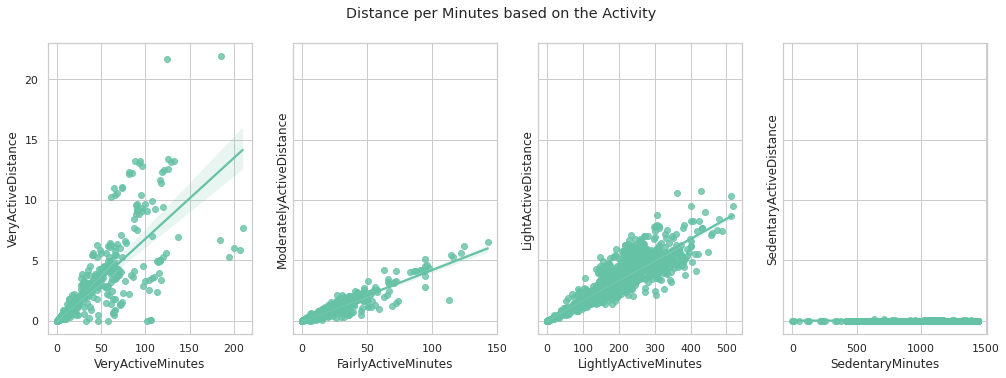

In [896]:
# Initial Exploratory Visualizations
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Distance per Minutes based on the Activity')

sns.regplot(data = X, x = 'VeryActiveMinutes', y = 'VeryActiveDistance', ax=axes[0])

sns.regplot(data = X, x = 'FairlyActiveMinutes', y = 'ModeratelyActiveDistance', ax=axes[1])

sns.regplot(data = X, x = 'LightlyActiveMinutes', y = 'LightActiveDistance', ax=axes[2])

sns.regplot(data = X, x = 'SedentaryMinutes', y = 'SedentaryActiveDistance', ax=axes[3])

Algorithm

intercept: 1665.7426768758332
slope: [0.08351327]


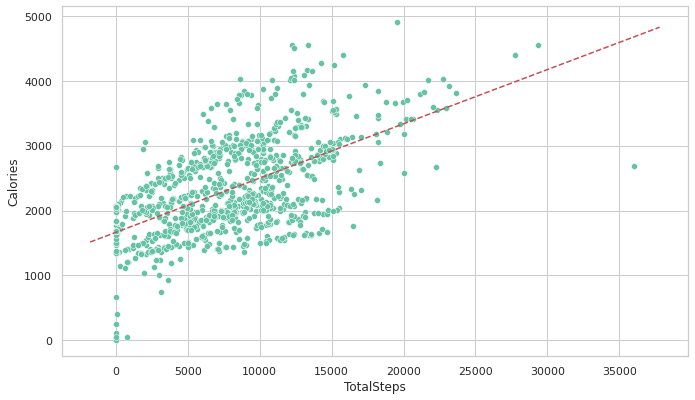

In [897]:
# fit a regression line to totalsteps and calories
X1 = X['TotalSteps'].values.reshape((-1, 1))
y = X['Calories'].values

model = LinearRegression()
model.fit(X1, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

def axline(slope, intercept):
    #Plot a line from slope and intercept
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color= 'r', ls = '--')
    
sns.scatterplot(data = X, x= 'TotalSteps', y ='Calories')
axline(model.coef_, model.intercept_);



In [898]:
X[X['TotalSteps']==0]['Calories'].describe()

count      77.000000
mean     1657.077922
std       557.082290
min         0.000000
25%      1496.000000
50%      1841.000000
75%      1980.000000
max      2664.000000
Name: Calories, dtype: float64

In [899]:
X[X['Calories']==0]


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
30   1503960366   2016-05-12           0            0.0              0.0   
653  6290855005   2016-05-10           0            0.0              0.0   
817  8253242879   2016-04-30           0            0.0              0.0   
879  8583815059   2016-05-12           0            0.0              0.0   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
30                        0.0                 0.0                       0.0   
653                       0.0                 0.0                       0.0   
817                       0.0                 0.0                       0.0   
879                       0.0                 0.0                       0.0   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
30                   0.0                      0.0                  0   
653                  0.0                      0.0                  0   
817                  0.0                      0.0                  0   
879                  0.0                      0.0                  0   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
30                     0                     0              1440         0   
653                    0                     0              1440         0   
817                    0                     0              1440         0   
879                    0                     0              1440         0   

     Weekend  day  Year  Month  
30     False   12  2016      5  
653    False   10  2016      5  
817     True   30  2016      4  
879    False   12  2016      5

In [900]:
X[X['Calories']!=0]
X=X[X['Calories']!=0]
len(X)


936

In [901]:
fitbit_df=X.merge(Y, how='inner', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])
fitbit_df.head(10)
fitbit_df.info()
print(len(fitbit_df))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   ActivityDate              413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  FairlyActiveMinutes       413 non-null    int64         
 12  LightlyActiveMinutes  

In [902]:
fitbit_df[fitbit_df.isna()].count()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Weekend                     0
day                         0
Year                        0
Month                       0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64

In [903]:
# drop activity date because this is not a time series analysis
# drop id since it is not relevant
fitbit_df = fitbit_df.drop(columns=['Id', 'ActivityDate','SleepDay'])

# The resulting combined dataframe looks like this
fitbit_df.head()



TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
0       13162           8.50             8.50                       0.0   
1       10735           6.97             6.97                       0.0   
2        9762           6.28             6.28                       0.0   
3       12669           8.16             8.16                       0.0   
4        9705           6.48             6.48                       0.0   

   VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                1.88                      0.55                 6.06   
1                1.57                      0.69                 4.71   
2                2.14                      1.26                 2.83   
3                2.71                      0.41                 5.04   
4                3.19                      0.78                 2.51   

   SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0                      0.0                 25                   13   
1                      0.0                 21                   19   
2                      0.0                 29                   34   
3                      0.0                 36                   10   
4                      0.0                 38                   20   

   LightlyActiveMinutes  SedentaryMinutes  Calories  Weekend  day  Year  \
0                   328               728      1985    False   12  2016   
1                   217               776      1797    False   13  2016   
2                   209               726      1745    False   15  2016   
3                   221               773      1863     True   16  2016   
4                   164               539      1728     True   17  2016   

   Month  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  
0      4                  1                 327             346  
1      4                  2                 384             407  
2      4                  1                 412             442  
3      4                  2                 340             367  
4      4                  1                 700             712

In [904]:
fitbit_df1=fitbit_df[['SedentaryMinutes', 'TotalSteps', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Calories']]
fitbit_df1.head()

SedentaryMinutes  TotalSteps  TotalMinutesAsleep  TotalTimeInBed  Calories
0               728       13162                 327             346      1985
1               776       10735                 384             407      1797
2               726        9762                 412             442      1745
3               773       12669                 340             367      1863
4               539        9705                 700             712      1728

In [905]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(fitbit_df1.iloc[:,:-1], 
                                                              fitbit_df1['Calories'], 
                                                              test_size=0.2, 
                                                              random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)



In [906]:

# scale the data with object range of 0-1
scaler = MinMaxScaler()

scaler.fit_transform(X_train)

scaler.transform(X_valid)
scaler.transform(X_test)



array([[0.63330599, 0.36764383, 0.40785908, 0.37555556],
       [0.59557014, 0.45576408, 0.57859079, 0.48777778],
       [0.6997539 , 0.0528282 , 0.5799458 , 0.49111111],
       [0.56193601, 0.54379642, 0.44715447, 0.38444444],
       [0.90730107, 0.20476421, 0.06504065, 0.05222222],
       [0.61443806, 0.31455193, 0.38617886, 0.33222222],
       [0.39294504, 0.42082363, 0.73441734, 0.63888889],
       [0.59639048, 0.49997802, 0.49186992, 0.44      ],
       [0.54060705, 0.47061926, 0.49728997, 0.41555556],
       [0.6923708 , 0.60326111, 0.09214092, 0.08444444],
       [0.3388023 , 0.35990858, 0.57181572, 0.53888889],
       [0.5561936 , 0.36171054, 0.59891599, 0.55111111],
       [0.62674323, 0.23829825, 0.47425474, 0.43222222],
       [0.58736669, 0.30769569, 0.61382114, 0.53555556],
       [0.47087777, 0.40047466, 0.63821138, 0.55222222],
       [0.73420837, 0.08996616, 0.44715447, 0.40333333],
       [0.43478261, 0.28774228, 0.6504065 , 0.55444444],
       [0.47497949, 0.8581286 ,

In [907]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
# Create list of median predictions that has the same length as y_valid
baseline_y = [y_train.median()] * len(y_valid)

# Compute the relevant scores
base_predictions = baseline_y
base_mae = mean_absolute_error(y_valid, base_predictions)
base_mse = mean_squared_error(y_valid, base_predictions)
base_r2 = r2_score(y_valid, base_predictions)
base_errors = abs(base_predictions - y_valid)
base_mape = 100 * np.mean(base_errors / y_valid)
base_accuracy = 100 - base_mape


In [908]:
regressor = LinearRegression()


In [909]:
mlr = regressor.fit(X_train, y_train)

scoring(mlr, X_test, y_test)

Model Performance
Mean Absolute Error: 541.5742.
Mean Squared Error: 459042.0570.
R^2 Score = 0.2454.
Accuracy = 75.66%.


In [910]:
# regression coefficients
print('Coefficients: ', mlr.coef_)

Coefficients:  [ 1.33541752  0.0818114   5.72356589 -4.4946448 ]


In [911]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(mlr.score(X_valid, y_valid)))

Variance score: 0.2695275628435322


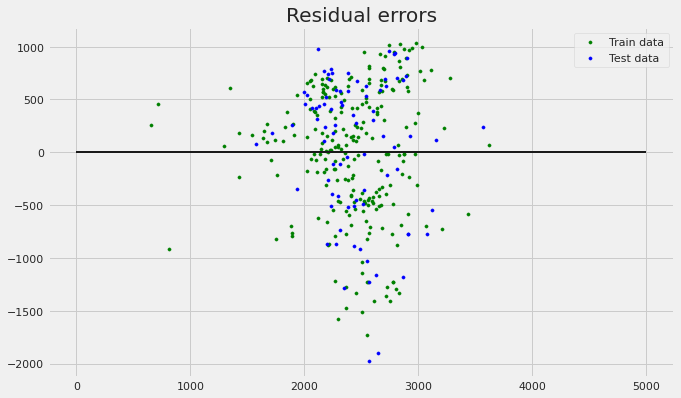

In [912]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(mlr.predict(X_train), mlr.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(mlr.predict(X_valid), mlr.predict(X_valid) - y_valid,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 5000, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

## Hyper Parameter Tuning 

In [913]:

# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [914]:
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.2583383977928812
STD:  0.06596111822701546




In [915]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score:  0.2587598645636492
Best Params:  {'alpha': 10000}


### Ridge

In [916]:
# Train model with default alpha=1
ridge = Ridge(alpha=10000).fit(X_train, y_train)
# get cross val scores
scoring(ridge, X_valid, y_valid)

Model Performance
Mean Absolute Error: 573.7368.
Mean Squared Error: 463473.5759.
R^2 Score = 0.2662.
Accuracy = 74.66%.


### Lasso 

In [917]:
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(lasso)

CV Mean:  0.25834089037660923
STD:  0.06595598968875731




In [918]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.2585351071545513
Best Params:  {'alpha': 100}


In [919]:
# Train model with default alpha=1
lasso = Lasso(alpha=100).fit(X_train, y_train)
# get cross val scores
scoring(lasso, X_valid, y_valid)

Model Performance
Mean Absolute Error: 572.5824.
Mean Squared Error: 462261.6331.
R^2 Score = 0.2681.
Accuracy = 74.73%.


### Elastic Net

In [920]:

# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
# get cross val scores
get_cv_scores(elastic_net)

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 70,80,100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

CV Mean:  0.2583481184405023
STD:  0.06594477925390878


Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best Score:  0.25874413595317963
Best Params:  {'alpha': 70, 'l1_ratio': 0.3}


In [921]:
# Train model with default alpha=1
elastic_net = ElasticNet(alpha=70, l1_ratio=0.3).fit(X_train, y_train)
# get cross val scores
scoring(elastic_net, X_valid, y_valid)

Model Performance
Mean Absolute Error: 574.3572.
Mean Squared Error: 464119.3491.
R^2 Score = 0.2651.
Accuracy = 74.63%.


# Extra Part 
## Data Imputation - KNN Imputer

In [922]:
fitbit_df

TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
0         13162           8.50             8.50                       0.0   
1         10735           6.97             6.97                       0.0   
2          9762           6.28             6.28                       0.0   
3         12669           8.16             8.16                       0.0   
4          9705           6.48             6.48                       0.0   
..          ...            ...              ...                       ...   
408        7174           4.59             4.59                       0.0   
409        1619           1.04             1.04                       0.0   
410        1831           1.17             1.17                       0.0   
411        2421           1.55             1.55                       0.0   
412        2283           1.46             1.46                       0.0   

     VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                  1.88                      0.55                 6.06   
1                  1.57                      0.69                 4.71   
2                  2.14                      1.26                 2.83   
3                  2.71                      0.41                 5.04   
4                  3.19                      0.78                 2.51   
..                  ...                       ...                  ...   
408                0.33                      0.36                 3.91   
409                0.00                      0.00                 1.04   
410                0.00                      0.00                 1.17   
411                0.00                      0.00                 1.55   
412                0.00                      0.00                 1.46   

     SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0                        0.0                 25                   13   
1                        0.0                 21                   19   
2                        0.0                 29                   34   
3                        0.0                 36                   10   
4                        0.0                 38                   20   
..                       ...                ...                  ...   
408                      0.0                 10                   20   
409                      0.0                  0                    0   
410                      0.0                  0                    0   
411                      0.0                  0                    0   
412                      0.0                  0                    0   

     LightlyActiveMinutes  SedentaryMinutes  Calories  Weekend  day  Year  \
0                     328               728      1985    False   12  2016   
1                     217               776      1797    False   13  2016   
2                     209               726      1745    False   15  2016   
3                     221               773      1863     True   16  2016   
4                     164               539      1728     True   17  2016   
..                    ...               ...       ...      ...  ...   ...   
408                   301               749      2896     True   30  2016   
409                    79               834      1962     True    1  2016   
410                   101               916      2015    False    2  2016   
411                   156               739      2297    False    3  2016   
412                   129               848      2067    False    4  2016   

     Month  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  
0        4                  1                 327             346  
1        4                  2                 384             407  
2        4                  1                 412             442  
3        4                  2                 340             367  
4        4                  1                 700            

In [923]:
df_total_steps_copy=fitbit_df[['TotalSteps']]
df_total_steps_copy['number_copy_1_percent'] = df_total_steps_copy[['TotalSteps']]
df_total_steps_copy['number_copy_5_percent'] = df_total_steps_copy[['TotalSteps']]
df_total_steps_copy['number_copy_10_percent'] = df_total_steps_copy[['TotalSteps']]

In [924]:
df_total_steps_copy

TotalSteps  number_copy_1_percent  number_copy_5_percent  \
0         13162                  13162                  13162   
1         10735                  10735                  10735   
2          9762                   9762                   9762   
3         12669                  12669                  12669   
4          9705                   9705                   9705   
..          ...                    ...                    ...   
408        7174                   7174                   7174   
409        1619                   1619                   1619   
410        1831                   1831                   1831   
411        2421                   2421                   2421   
412        2283                   2283                   2283   

     number_copy_10_percent  
0                     13162  
1                     10735  
2                      9762  
3                     12669  
4                      9705  
..                      ...  
408                    7174  
409                    1619  
410                    1831  
411                    2421  
412                    2283  

[413 rows x 4 columns]

In [925]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [926]:
create_missing(df_total_steps_copy, 0.01, 'number_copy_1_percent')
create_missing(df_total_steps_copy, 0.05, 'number_copy_5_percent')
create_missing(df_total_steps_copy, 0.1, 'number_copy_10_percent')

In [927]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [928]:
print(get_percent_missing(df_total_steps_copy))

                                   column_name  percent_missing
TotalSteps                          TotalSteps         0.000000
number_copy_1_percent    number_copy_1_percent         0.968523
number_copy_5_percent    number_copy_5_percent         5.084746
number_copy_10_percent  number_copy_10_percent         9.927361


In [929]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_total_steps_copy['number_copy_1_percent'].isna())[0])
number_5_idx = list(np.where(df_total_steps_copy['number_copy_5_percent'].isna())[0])
number_10_idx = list(np.where(df_total_steps_copy['number_copy_10_percent'].isna())[0])

In [930]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_total_steps_copy['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_total_steps_copy['number_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_total_steps_copy['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_total_steps_copy['number_copy_1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_total_steps_copy['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_total_steps_copy['number_copy_1_percent'])}")

Length of number_1_idx is 4 and it contains 0.9685230024213075% of total data in column | Total rows: 413
Length of number_5_idx is 21 and it contains 5.084745762711865% of total data in column | Total rows: 413
Length of number_10_idx is 41 and it contains 9.927360774818402% of total data in column | Total rows: 413


In [931]:
#Creating a seperate dataframe for performing the KNN imputation
df_total_steps_copy1 = df_total_steps_copy[['TotalSteps','number_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_total_steps_copy1), columns = df_total_steps_copy1.columns)

In [932]:
imputed_number_df.sample(10)

TotalSteps  number_copy_10_percent
171      3945.0                  3945.0
248      9769.0                  9769.8
344     14365.0                 14365.0
302      4477.0                  4477.0
284      4038.0                  4038.0
21      10060.0                 10060.0
227      2752.0                  2752.0
321     10320.0                 10314.4
388      8712.0                  8712.0
315     11835.0                 11835.0

In [933]:
print(get_percent_missing(imputed_number_df))

                                   column_name  percent_missing
TotalSteps                          TotalSteps              0.0
number_copy_10_percent  number_copy_10_percent              0.0
